In [3]:
from google.colab import files
uploaded = files.upload()

Saving University_A_Students.csv to University_A_Students.csv
Saving University_B_Students.csv to University_B_Students.csv


In [4]:
# Step 1: Import libraries
import pandas as pd   # pandas is used for working with tables of data
import matplotlib.pyplot as plt   # matplotlib is used for creating graphs and charts

# Step 2: Load the datasets
univ_a = pd.read_csv('University_A_Students.csv')   # reads University A CSV file into a table called univ_a
univ_b = pd.read_csv('University_B_Students.csv')   # reads University B CSV file into a table called univ_b

# Step 3: Show first 5 rows of each to check
print(univ_a.head())   # shows first 5 rows of univ_a
print(univ_b.head())   # shows first 5 rows of univ_b


             Name  Age   Gender   GPA  Attendance (%) Activities Final Result  \
0      Jane Smith   19     male  2.90              97        Yes         Fail   
1     Chris Brown   23   female  2.13              96         No         Pass   
2  Emily Williams   22     Male   NaN              93        Yes         Fail   
3   Jane Martinez   22   FEMALE  3.18              80         No         Pass   
4     Jane Taylor   20   FEMALE   NaN              76         No         Pass   

  Scholarship Eligible  
0                  NaN  
1                   No  
2                  NaN  
3                  Yes  
4                  Yes  
             Name  Age  Gender   GPA  Attendance (%) Activities Final Result  \
0      John Brown   22  FEMALE  3.04              84         No         Fail   
1    Laura Taylor   22    male  3.23              88         No         Fail   
2      Jane Davis   18    male  3.55              88         No         Pass   
3  Michael Taylor   21    male  3.65       

In [5]:
# Step 4: Check missing values
print(univ_a.isnull().sum())   # counts how many missing (empty) values are in each column for univ_a
print(univ_b.isnull().sum())   # same for univ_b


Name                     0
Age                      0
Gender                   0
GPA                     12
Attendance (%)           0
Activities               0
Final Result             0
Scholarship Eligible    20
dtype: int64
Name                     0
Age                      0
Gender                   0
GPA                      3
Attendance (%)           0
Activities               0
Final Result             0
Scholarship Eligible    16
dtype: int64


In [7]:
# Step 5: Standardize Gender column
univ_a['Gender'] = univ_a['Gender'].str.strip().str.capitalize()   # Remove extra spaces and fix casing (male → Male, FEMALE → Female)
univ_b['Gender'] = univ_b['Gender'].str.strip().str.capitalize()


In [8]:
# Step 6: Fill missing GPA with mean GPA of each university
univ_a['GPA'] = univ_a['GPA'].fillna(univ_a['GPA'].mean())   # find mean and fill missing GPA
univ_b['GPA'] = univ_b['GPA'].fillna(univ_b['GPA'].mean())


In [9]:
# Step 7: Remove duplicates
univ_a = univ_a.drop_duplicates()   # removes any duplicate rows in University A
univ_b = univ_b.drop_duplicates()   # removes any duplicate rows in University B


In [11]:
# Step 8: Combine both universities into one table
combined_data = pd.concat([univ_a, univ_b], ignore_index=True)   # joins two tables row-wise, and resets row numbers
print(combined_data.head())   # show first 5 rows of the new combined table


             Name  Age  Gender       GPA  Attendance (%) Activities  \
0      Jane Smith   19    Male  2.900000              97        Yes   
1     Chris Brown   23  Female  2.130000              96         No   
2  Emily Williams   22    Male  2.862105              93        Yes   
3   Jane Martinez   22  Female  3.180000              80         No   
4     Jane Taylor   20  Female  2.862105              76         No   

  Final Result Scholarship Eligible  
0         Fail                  NaN  
1         Pass                   No  
2         Fail                  NaN  
3         Pass                  Yes  
4         Pass                  Yes  


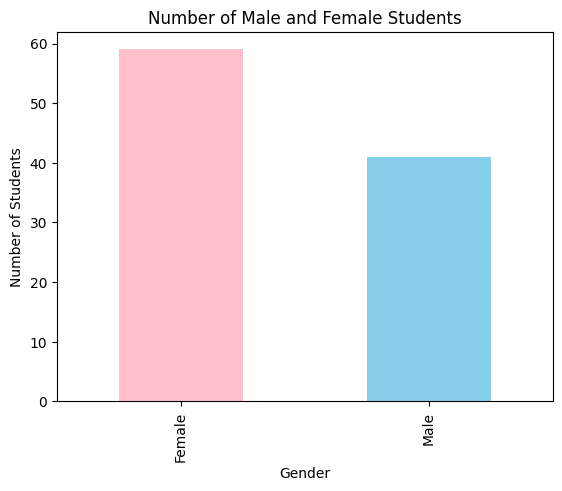

In [13]:
# Step 7: Create a Bar Chart for Gender Counts

# Count how many Males and Females
gender_counts = combined_data['Gender'].value_counts()

# Plot the bar chart
gender_counts.plot(kind='bar', color=['pink', 'skyblue'])

# Add title and labels
plt.title('Number of Male and Female Students')
plt.xlabel('Gender')
plt.ylabel('Number of Students')

# Show the chart
plt.show()


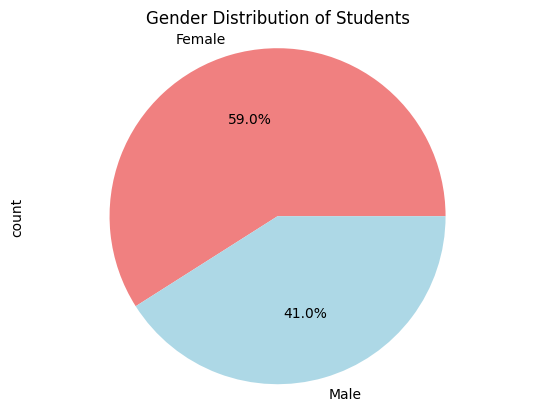

In [15]:
 # Step 8: Create a Pie Chart for Gender Counts

# Create pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])

# Add title
plt.title('Gender Distribution of Students')

# Equal aspect ratio so the pie is a circle
plt.axis('equal')

# Show the chart
plt.show()


In [19]:
# Add a new column to each dataset to identify the university
univ_a['University'] = 'University A'   # Assign "University A" to all rows in univ_a
univ_b['University'] = 'University B'   # Assign "University B" to all rows in univ_b

# Combine the two datasets
combined_data = pd.concat([univ_a, univ_b], ignore_index=True)


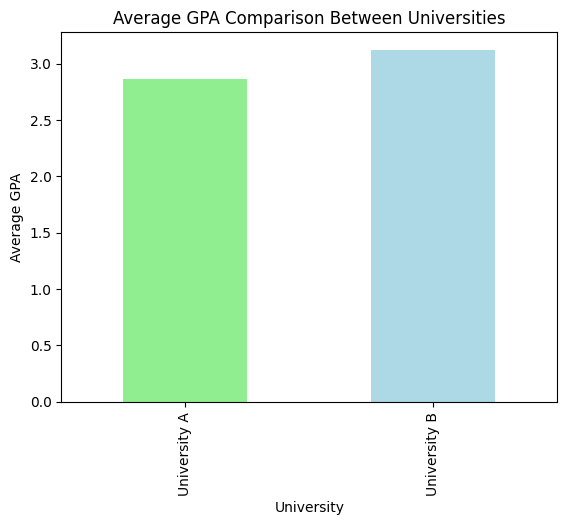

In [20]:
# Step 1: Compare GPA Between Two Universities

# Group data by University and calculate average GPA
gpa_comparison = combined_data.groupby('University')['GPA'].mean()

# Plot the result
gpa_comparison.plot(kind='bar', color=['lightgreen', 'lightblue'])

# Add title and labels
plt.title('Average GPA Comparison Between Universities')
plt.xlabel('University')
plt.ylabel('Average GPA')

# Show the chart
plt.show()


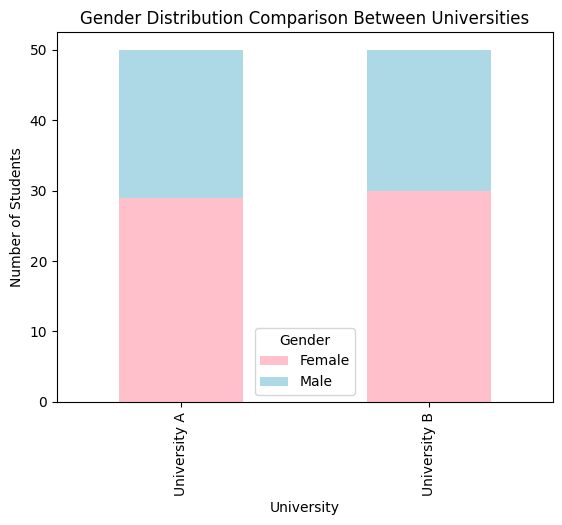

In [23]:
# Step 2: Gender Distribution Comparison

# Group by University and Gender, then count the number of males and females
gender_counts = combined_data.groupby(['University', 'Gender']).size().unstack()

# Plot the result
gender_counts.plot(kind='bar', stacked=True, color=['PINK', 'LIGHTBLUE'])

# Add title and labels
plt.title('Gender Distribution Comparison Between Universities')
plt.xlabel('University')
plt.ylabel('Number of Students')

# Show the chart
plt.show()


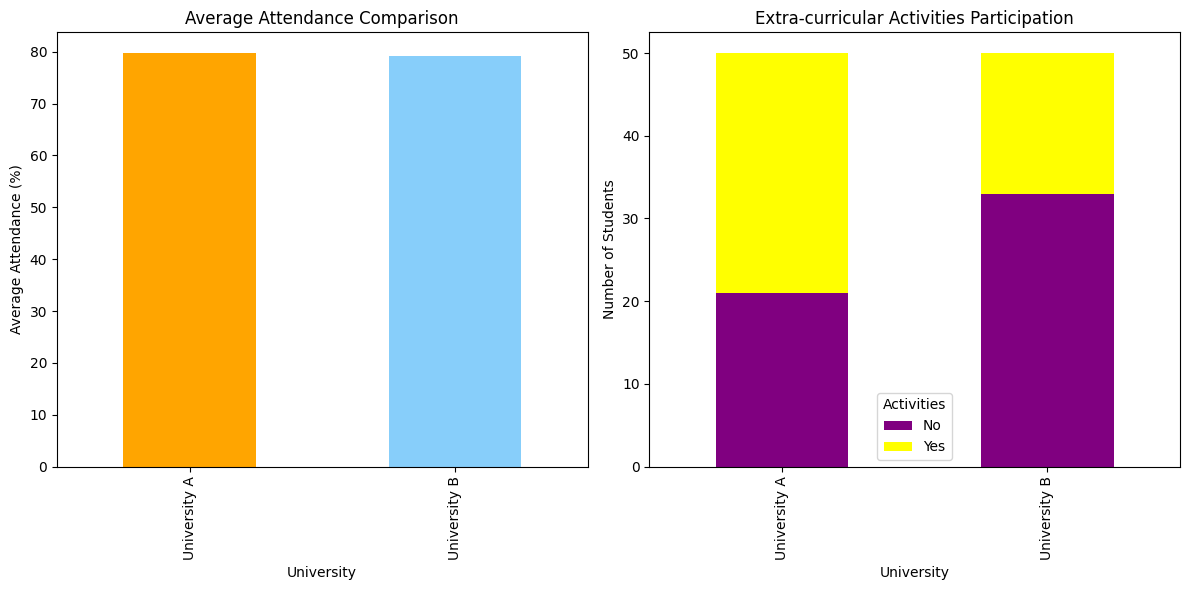

In [26]:
# Step 3: Attendance and Activities Comparison

# Calculate the average attendance for each university
attendance_avg = combined_data.groupby('University')['Attendance (%)'].mean()

# Count the number of students involved in activities (Yes or No)
activity_counts = combined_data.groupby(['University', 'Activities']).size().unstack()

# Create subplots for the two charts
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the attendance comparison
attendance_avg.plot(kind='bar', ax=ax[0], color=['orange', 'lightskyblue'], title='Average Attendance Comparison', xlabel='University', ylabel='Average Attendance (%)')

# Plot the activities participation comparison
activity_counts.plot(kind='bar', stacked=True, ax=ax[1], color=['PURPLE', 'YELLOW'], title='Extra-curricular Activities Participation', xlabel='University', ylabel='Number of Students')

# Show the charts
plt.tight_layout()
plt.show()


In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Split data into train and test sets
from sklearn.linear_model import LogisticRegression  # Machine learning model (Logistic Regression)
from sklearn.metrics import accuracy_score  # Measure model accuracy

In [33]:
# Selecting features (independent variables) and target (dependent variable)
features = combined_data[['GPA', 'Attendance (%)']]  # We use GPA and Attendance to predict Final Result
target = combined_data['Final Result']  # What we want to predict (Pass/Fail)



In [34]:
# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# X_train and X_test are the features (GPA, Attendance)
# y_train and y_test are the target (Pass/Fail)


In [35]:
# Create the model
model = LogisticRegression()

# Train the model with the training data (X_train and y_train)
model.fit(X_train, y_train)


LogisticRegression()

In [36]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 55.00%


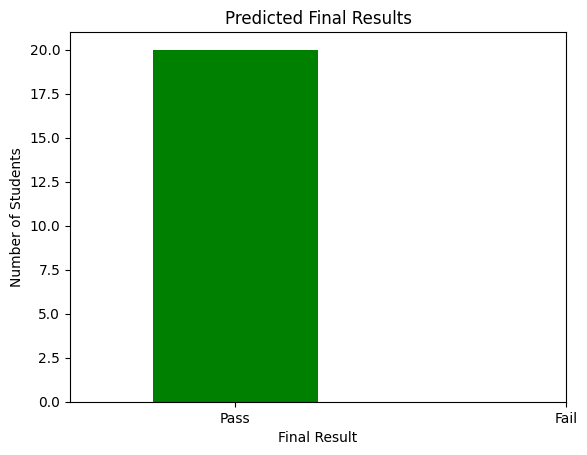

In [37]:
# Plotting the bar chart
import matplotlib.pyplot as plt

# Count the occurrences of Pass and Fail
result_counts = pd.Series(y_pred).value_counts()

# Create the bar chart
result_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Predicted Final Results')
plt.xlabel('Final Result')
plt.ylabel('Number of Students')
plt.xticks(ticks=[0, 1], labels=['Pass', 'Fail'], rotation=0)
plt.show()
